In [1]:
import pandas as pd
import numpy as np

# Sommaire <a class='anchor' id='S'></a>

## [I, découverte et nettoyage des données](#I)
#### [A, étude des données](#IA)
#### [B, travail sur la colonne product_category_tree](#IB)

## [II, mise en place d'un modèle](#II)
#### [A, Nettoyage et normalisation](#IIA)
#### [B, Word embeddings](#IIB)
#### [C, Modélisation par Latent Dirichlet allocation (LDA)](#IIC)
#### [D, Modélisation par Negative Matrix factorization (NMF)](#IID)

## [III, Mise en place d'un réseau de neurone](#III)

#### [A, Préparation des datas](#IIIA)
#### [B, Création d'un réseau de neurone récurrent simple RNN](#IIIB)
#### [C, Création d'un RNN bidirectionnel](#IIIC)

## [Bonus : Mise en place du modèle](#bonus)

# I, Découverte et nettoyage des données <a class='anchor' id='I'></a>

## A, étude des données <a class='anchor' id='IA'></a>

In [15]:
data = pd.read_csv('flipkart_com-ecommerce_sample_1050.csv', index_col=[0], parse_dates=[1])

In [16]:
data.sample(3)

,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
uniq_id,,,,,,,,,,,,,,
fc9a650d545a50c72556bed0df59efa1,2015-12-29 05:07:38+00:00,http://www.flipkart.com/himtek-light-led-1-usb...,Himtek light led 1 USB Led Light,"[""Computers >> Laptop Accessories >> USB Gadge...",USGEDMYNBNACWGHG,299.0,119.0,fc9a650d545a50c72556bed0df59efa1.jpg,False,Buy Himtek light led 1 USB Led Light for Rs.11...,No rating available,No rating available,Himtek,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
2476ae5a5e045876aa08f5919cb3b91b,2016-03-18 08:01:41+00:00,http://www.flipkart.com/m-s-rugs-pink-blue-woo...,"M S Rugs Pink, Blue Wool Dhurrie","[""Home Furnishing >> Floor Coverings >> Carpet...",CPGEGVXAQUV6RF6J,5300.0,3100.0,2476ae5a5e045876aa08f5919cb3b91b.jpg,False,"Key Features of M S Rugs Pink, Blue Wool Dhurr...",No rating available,No rating available,M S Rugs,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
5c6b9db55291a68d99c4bb9a88266e27,2015-12-01 06:13:00+00:00,http://www.flipkart.com/edimax-br6524n-n300-wi...,Edimax BR6524N N300 Wireless Router,"[""Computers >> Network Components >> Routers >...",RTRDYKYKKGPHZGHY,4200.0,2799.0,5c6b9db55291a68d99c4bb9a88266e27.jpg,False,Buy Edimax BR6524N N300 Wireless Router only f...,No rating available,No rating available,Edimax,"{""product_specification""=>[{""key""=>""Wireless S..."


In [4]:
data.shape

(1050, 14)

In [5]:
data.isna().sum()

crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

In [6]:
data.description[0]

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you

In [7]:
data.product_specifications[0]

'{"product_specification"=>[{"key"=>"Brand", "value"=>"Elegance"}, {"key"=>"Designed For", "value"=>"Door"}, {"key"=>"Type", "value"=>"Eyelet"}, {"key"=>"Model Name", "value"=>"Abstract Polyester Door Curtain Set Of 2"}, {"key"=>"Model ID", "value"=>"Duster25"}, {"key"=>"Color", "value"=>"Multicolor"}, {"key"=>"Length", "value"=>"213 cm"}, {"key"=>"Number of Contents in Sales Package", "value"=>"Pack of 2"}, {"key"=>"Sales Package", "value"=>"2 Curtains"}, {"key"=>"Material", "value"=>"Polyester"}]}'

In [8]:
for column in data:
    if len(data[column].unique()) < 50: 
        print(column, data[column].unique())

is_FK_Advantage_product [False  True]
product_rating ['No rating available' '5' '1' '2.3' '2.7' '4.5' '4' '3.8' '4.3' '3.7'
 '3.6' '3.5' '4.1' '4.9' '3.1' '4.2' '4.8' '4.4' '3.9' '3' '3.3' '2.5' '2'
 '4.7' '2.2' '3.2' '1.5']
overall_rating ['No rating available' '5' '1' '2.3' '2.7' '4.5' '4' '3.8' '4.3' '3.7'
 '3.6' '3.5' '4.1' '4.9' '3.1' '4.2' '4.8' '4.4' '3.9' '3' '3.3' '2.5' '2'
 '4.7' '2.2' '3.2' '1.5']


##### [sommaire](#S)

## B, travail sur la colonne product_category_tree <a class='anchor' id='IB'></a>

In [9]:
data.product_category_tree[0]

'["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]'

In [17]:
data = pd.concat([data, data['product_category_tree'].str.split(' >> ', 4, expand=True)], axis=1)

In [11]:
data.sample(3)

,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,0,1,2,3,4
uniq_id,,,,,,,,,,,,,,,,,,,
6325bf868b9040a0599f257aba42e9e0,2016-03-03 11:29:08+00:00,http://www.flipkart.com/doraemon-gift-family-c...,Doraemon Gift Family Ceramic Coffee Mug Multic...,"[""Baby Care >> Baby & Kids Gifts >> Decoration...",DECEG7K7Y3URGWXH,399.0,280.0,6325bf868b9040a0599f257aba42e9e0.jpg,False,Specifications of Doraemon Gift Family Ceramic...,No rating available,No rating available,Doraemon Gift Family Ceramic Coffee Mug,"{""product_specification""=>[{""key""=>""Sales Pack...","[""Baby Care",Baby & Kids Gifts,Decorations,Doraemon Gift Family Ceramic Coffee Mug Decora...,Doraemon Gift Family Ceramic Coffee Mug Multic...
0ca8e323551dd7107ef57ef7c3e77aee,2015-12-31 09:19:31+00:00,http://www.flipkart.com/niksales-7-w-led-bulb/...,NIKsales 7 W LED Bulb,"[""Kitchen & Dining >> Lighting >> Bulbs >> NIK...",BLBEDZE5C9G5GDP8,750.0,365.0,0ca8e323551dd7107ef57ef7c3e77aee.jpg,False,Buy NIKsales 7 W LED Bulb for Rs.365 online. N...,No rating available,No rating available,NIKsales,"{""product_specification""=>[{""key""=>""Brand"", ""v...","[""Kitchen & Dining",Lighting,Bulbs,"NIKsales Bulbs""]",None
ead122f4b1da293eb2d719baf104dfc9,2015-12-31 09:19:31+00:00,http://www.flipkart.com/lotus-safe-sun-uv-scre...,Lotus Safe Sun UV Screen MatteGel - SPF 50 PA+++,"[""Beauty and Personal Care >> Body and Skin Ca...",SNRE53FVTK2FQAKU,395.0,320.0,ead122f4b1da293eb2d719baf104dfc9.jpg,False,Flipkart.com: Buy Lotus Safe Sun UV Screen Mat...,4.3,4.3,NaN,"{""product_specification""=>[{""key""=>""Quantity"",...","[""Beauty and Personal Care",Body and Skin Care,Face Care,Sunscreen,"Lotus Sunscreen""]"


In [18]:
data[0] = data[0].str.replace('^\["', '', regex=True)
data[3] = data[3].str.replace('"]', '', regex=True)
data[4] = data[4].str.replace('"]', '', regex=True)

In [19]:
data.rename(columns={0 : 'cat_1', 1 : 'cat_2', 2 : 'cat_3', 3 : 'cat_4', 4 : 'cat_5'}, inplace=True)

In [14]:
for column in data:
    if len(data[column].unique()) < 50: 
        print(column, data[column].unique())
        print()

is_FK_Advantage_product [False  True]

product_rating ['No rating available' '5' '1' '2.3' '2.7' '4.5' '4' '3.8' '4.3' '3.7'
 '3.6' '3.5' '4.1' '4.9' '3.1' '4.2' '4.8' '4.4' '3.9' '3' '3.3' '2.5' '2'
 '4.7' '2.2' '3.2' '1.5']

overall_rating ['No rating available' '5' '1' '2.3' '2.7' '4.5' '4' '3.8' '4.3' '3.7'
 '3.6' '3.5' '4.1' '4.9' '3.1' '4.2' '4.8' '4.4' '3.9' '3' '3.3' '2.5' '2'
 '4.7' '2.2' '3.2' '1.5']

cat_1 ['Home Furnishing' 'Baby Care' 'Watches' 'Home Decor & Festive Needs'
 'Kitchen & Dining' 'Beauty and Personal Care' 'Computers']



In [15]:
data.cat_1.value_counts()

Home Furnishing               150
Baby Care                     150
Watches                       150
Home Decor & Festive Needs    150
Kitchen & Dining              150
Beauty and Personal Care      150
Computers                     150
Name: cat_1, dtype: int64

In [20]:
for i in data.cat_1.unique():
    temp = data[data.cat_1 == i]
    if len(temp.cat_2.unique()) < 15:
        print(i, temp.cat_2.unique())
        print()

Home Furnishing ['Curtains & Accessories' 'Bed Linen' 'Living Room Furnishing'
 'Bath Linen' 'JMD Home Furnishing' "Kripa's Home Furnishing"
 'Kitchen & Dining Linen' 'Cushions, Pillows & Covers' 'Living'
 'Tidy Home Furnishing' 'Living"]' 'Floor Coverings']

Baby Care ['Baby Bath & Skin' 'Infant Wear' 'Feeding & Nursing' 'Baby Bedding'
 'Furniture & Furnishings' 'Baby Grooming' 'Diapering & Potty Training'
 'Strollers & Activity Gear' 'Baby & Kids Gifts']

Watches ['Wrist Watches' 'Clocks']

Home Decor & Festive Needs ['Candles & Fragrances' 'Wall Decor & Clocks' 'Table Decor & Handicrafts'
 'Flowers, Plants & Vases' 'Showpieces' 'Decorative Lighting & Lamps'
 'TRUE Home Decor & Festive Needs"]' 'Showpiece' 'Garden & Leisure'
 'Religion & Devotion']

Kitchen & Dining ['Tableware & Cutlery' 'Lighting' 'Coffee Mugs' 'Cookware'
 'Containers & Bottles' 'Consumables & Disposables' 'Kitchen Tools'
 'Bar & Glassware' 'Pressure Cookers & Pans' 'Housekeeping & Laundry'
 'Dinnerware & Crockery'

In [17]:
data.sample(3)

,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,cat_1,cat_2,cat_3,cat_4,cat_5
uniq_id,,,,,,,,,,,,,,,,,,,
3f9c4d0e8c3bca9c870e41f5098f90d6,2016-01-01 13:15:34+00:00,http://www.flipkart.com/valtellina-checkered-d...,Valtellina Checkered Double Blanket Brown,"[""Home Furnishing >> Bed Linen >> Blankets, Qu...",BLAE39ZZYDGFHKUH,2055.0,878.0,3f9c4d0e8c3bca9c870e41f5098f90d6.jpg,False,Buy Valtellina Checkered Double Blanket Brown ...,No rating available,No rating available,Valtellina,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Bed Linen,"Blankets, Quilts & Dohars""]",None,None
b551f20c6a8a1dc3d102a5f04bc8d7d6,2015-12-01 06:13:00+00:00,http://www.flipkart.com/wild-stone-smoke-juice...,Wild Stone Smoke And Juice Combo Set,"[""Beauty and Personal Care >> Fragrances >> De...",CAGE6FZQ3XXVG4V5,360.0,327.0,b551f20c6a8a1dc3d102a5f04bc8d7d6.jpg,False,Flipkart.com: Buy Wild Stone Smoke And Juice C...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Number of ...",Beauty and Personal Care,Fragrances,Deodorants,Combos,Wild Stone Combos
e87bad0de3447c9ac3a8555e89545c75,2016-01-01 13:15:34+00:00,http://www.flipkart.com/baby-bucket-cartoon-si...,Baby Bucket Cartoon Single Blanket blue,"[""Home Furnishing >> Bed Linen >> Blankets, Qu...",BLAEE4WSG8CYBRVY,1695.0,1395.0,e87bad0de3447c9ac3a8555e89545c75.jpg,False,Buy Baby Bucket Cartoon Single Blanket blue at...,No rating available,No rating available,Baby Bucket,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Bed Linen,"Blankets, Quilts & Dohars""]",None,None


On remarque qu'il y a 7 catégories principales de produits.<br/>
Ces catégories doivent, dans notre projet, être déterminés à partir des informations de la catégorie description.<br/>
Aussi, nous gardons ces deux colonnes pour élaborer notre modèle.

In [21]:
data = data.loc[:,['description', 'cat_1']]

In [22]:
data.sample(3)

,description,cat_1
uniq_id,,
7d2883d833e215d3092c7f53572f870d,Specifications of Kerastase Nutritive Bain Sat...,Beauty and Personal Care
d136aa676ef52b09eab65762940957fe,Key Features of scarlet tanager bird normal PO...,Home Decor & Festive Needs
a67d4b8df18ac476cd1b0bbd80e589a4,Buy Wild Ferns Lanolin Eye Creme with Collagen...,Beauty and Personal Care


In [20]:
data.to_csv('data.csv')

In [21]:
data.shape

(1050, 2)

##### [sommaire](#S)

# II, Mise en place d'un modèle <a class='anchor' id='II'></a>

## A, Nettoyage et normalisation <a class='anchor' id='IIA'></a>

In [22]:
db = data.groupby('cat_1')['description'].apply(list).to_dict()
for k,v in db.items():
    db[k] = ''.join(db[k])

In [23]:
db.keys()

dict_keys(['Baby Care', 'Beauty and Personal Care', 'Computers', 'Home Decor & Festive Needs', 'Home Furnishing', 'Kitchen & Dining', 'Watches'])

In [24]:
db['Baby Care'][:50]

'Specifications of Sathiyas Cotton Bath Towel (3 Ba'

In [25]:
'''
description = data.description.values
categories = data.cat_1.values
categories_reduites = data.cat_1.unique()
'''

'\ndescription = data.description.values\ncategories = data.cat_1.values\ncategories_reduites = data.cat_1.unique()\n'

### Tokenisation et analyse des fréquences

In [2]:
import nltk
import string

In [27]:
tokenizer = nltk.RegexpTokenizer(r'\w+') #tous les caractères alphanumériques

In [28]:
for k,v in db.items():
    db[k] = tokenizer.tokenize(v.lower())

In [29]:
db['Baby Care'][:10]

['specifications',
 'of',
 'sathiyas',
 'cotton',
 'bath',
 'towel',
 '3',
 'bath',
 'towel',
 'red']

In [30]:
stats, freq = dict(), dict()

In [31]:
for k,v in db.items():
    freq[k] = fq = nltk.FreqDist(v)
    stats[k] = {'total' : len(v), 'unique' : len(fq.keys())}

In [32]:
freq['Baby Care']

FreqDist({'of': 379, 'baby': 316, 's': 271, 'for': 227, 'the': 213, 'cotton': 191, 'in': 191, 'details': 174, 'girl': 165, 'fabric': 164, ...})

In [33]:
stats['Baby Care']

{'total': 12169, 'unique': 1646}

In [34]:
df = pd.DataFrame.from_dict(stats, orient='index')

In [35]:
df = df.sort_values(by='total', ascending=False)

In [36]:
import matplotlib.pyplot as plt

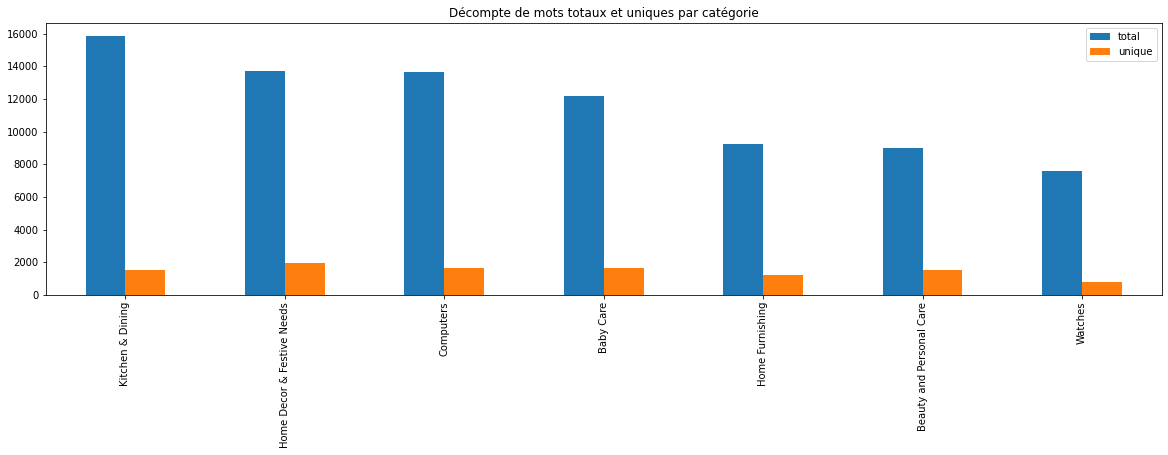

In [37]:
df.plot(kind='bar', figsize=(20,5))
plt.title('Décompte de mots totaux et uniques par catégorie')
plt.savefig("decompte_mots_1.png", bbox_inches='tight', transparent=True)
plt.show()

In [38]:
df1 = pd.DataFrame.from_dict(freq, orient='index')

In [39]:
total = pd.DataFrame(df1.sum(), columns=['total']).T

In [40]:
df1 = pd.concat([df1, total], axis=0)

In [41]:
df1 = df1.loc['total'].sort_values( ascending=False)[:20]

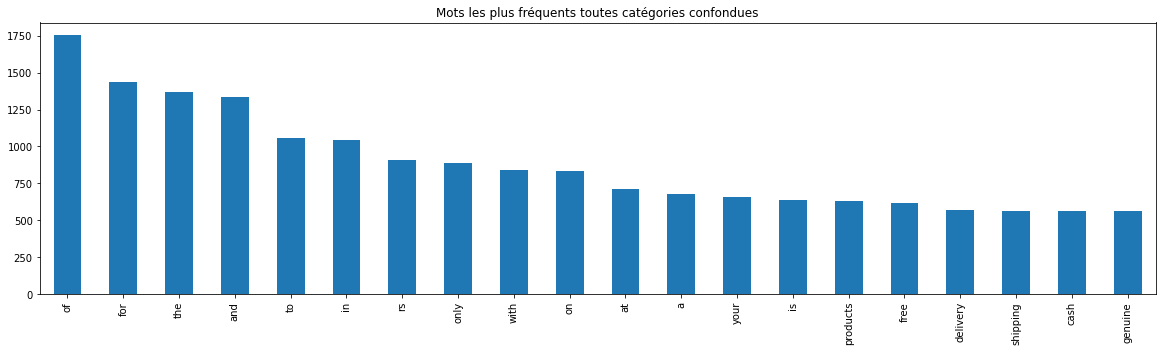

In [42]:
df1.plot(kind='bar', figsize=(20,5))
plt.title('Mots les plus fréquents toutes catégories confondues')
plt.savefig("mots_plus_frequent.png", bbox_inches='tight', transparent=True)
plt.show()

### Tokenisation et analyse des fréquences avec stop_words

In [3]:
from nltk.corpus import stopwords

In [44]:
stop_words = stopwords.words('english')

add_stop_words = ['cm', 'buy', 'shipping', 'delivery', 'guarantee', 'price', 'prices', 'cash', 'free']

stop_words = stop_words + add_stop_words

In [45]:
db2 = db.copy()

In [46]:
for k,v in db2.items():
    db2[k] = [i for i in db2[k] if i not in stop_words]
    db2[k] = [i for i in db2[k] if not i.isdigit()]

In [47]:
stats, freq = dict(), dict()

for k,v in db2.items():
    freq[k] = fq = nltk.FreqDist(v)
    stats[k] = {'total' : len(v), 'unique' : len(fq.keys())}

df2 = pd.DataFrame.from_dict(stats, orient='index')

In [48]:
freq['Baby Care']

FreqDist({'baby': 316, 'cotton': 191, 'details': 174, 'girl': 165, 'fabric': 164, 'dress': 104, 'ideal': 98, 'general': 96, 'rs': 95, 'boy': 92, ...})

In [49]:
df2 = df2.sort_values(by='total', ascending=False)

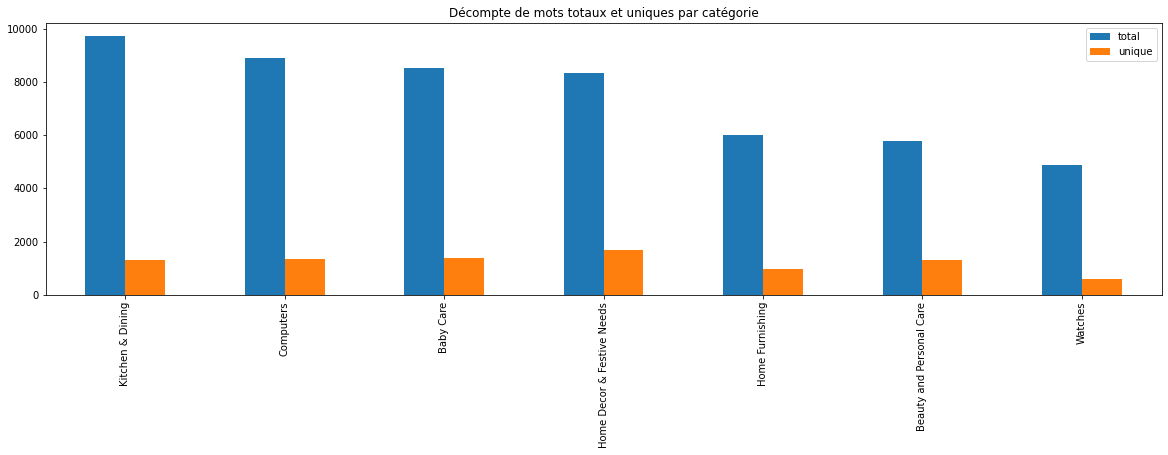

In [50]:
df2.plot(kind='bar', figsize=(20,5))
plt.title('Décompte de mots totaux et uniques par catégorie')
plt.savefig("decompte_mots_2_stop_words.png", bbox_inches='tight', transparent=True)
plt.show()

In [51]:
df3 = pd.DataFrame.from_dict(freq, orient='index')
total = pd.DataFrame(df3.sum(), columns=['total']).T
df3 = pd.concat([df3, total], axis=0)
df3 = df3.loc['total'].sort_values( ascending=False)[:20]

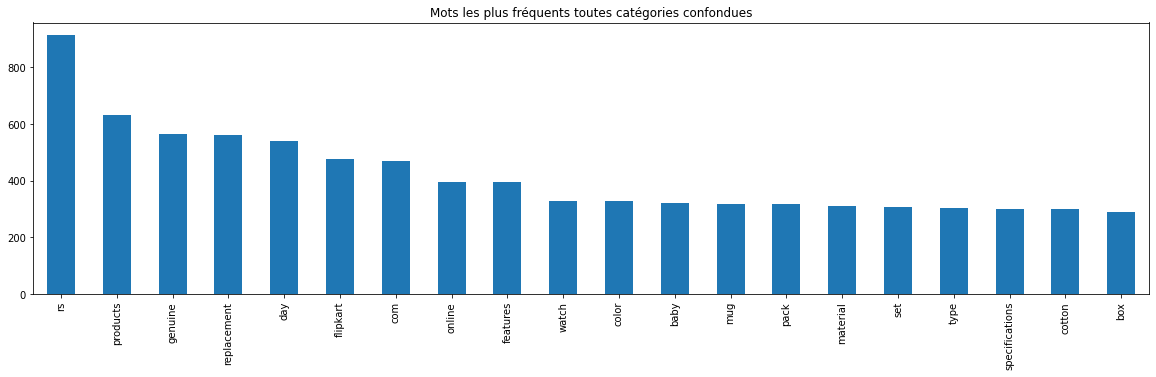

In [52]:
df3.plot(kind='bar', figsize=(20,5))
plt.title('Mots les plus fréquents toutes catégories confondues')
plt.savefig("mots_plus_frequent_stop_words.png", bbox_inches='tight', transparent=True)
plt.show()

### Tokenisation et analyse des fréquences avec stop_words et stemming

In [4]:
from nltk.stem import PorterStemmer

In [54]:
db3 = db2.copy()

In [55]:
ps = PorterStemmer()

In [56]:
for k,v in db3.items():        
    db3[k] = [ps.stem(w) for w in db3[k]]

In [57]:
stats, freq = dict(), dict()

for k,v in db3.items():
    freq[k] = fq = nltk.FreqDist(v)
    stats[k] = {'total' : len(v), 'unique' : len(fq.keys())}

df4 = pd.DataFrame.from_dict(stats, orient='index')

In [58]:
freq['Baby Care']

FreqDist({'babi': 317, 'girl': 196, 'cotton': 191, 'detail': 180, 'fabric': 164, 'boy': 112, 'print': 104, 'dress': 104, 'ideal': 98, 'gener': 96, ...})

In [59]:
df4 = df4.sort_values(by='total', ascending=False)

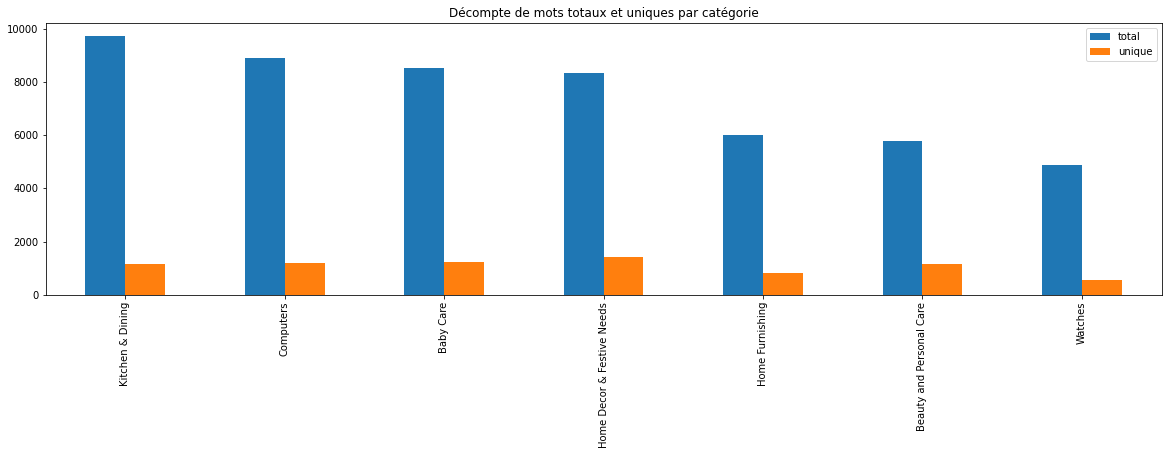

In [60]:
df4.plot(kind='bar', figsize=(20,5))
plt.title('Décompte de mots totaux et uniques par catégorie')
plt.savefig("decompte_mots_3_stop_words_stemming.png", bbox_inches='tight', transparent=True)
plt.show()

In [61]:
df5 = pd.DataFrame.from_dict(freq, orient='index')
total = pd.DataFrame(df5.sum(), columns=['total']).T
df6 = pd.concat([df5, total], axis=0)
df6 = df6.loc['total'].sort_values( ascending=False)[:20]

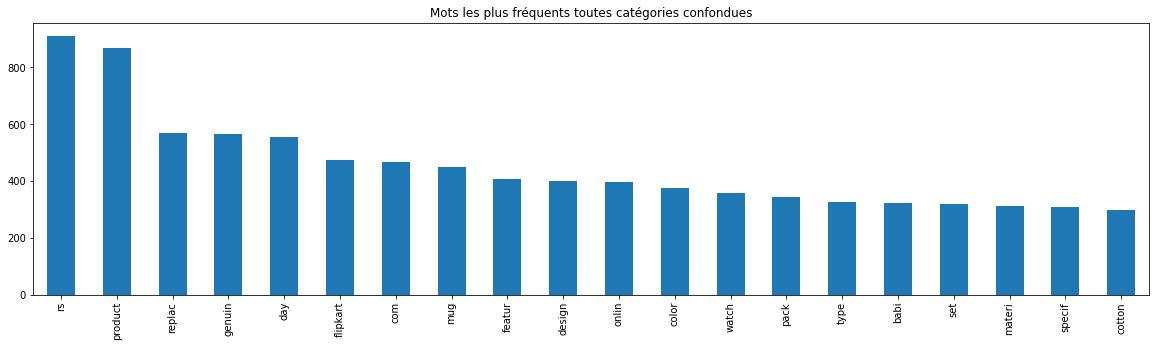

In [62]:
df6.plot(kind='bar', figsize=(20,5))
plt.title('Mots les plus fréquents toutes catégories confondues')
plt.savefig("mots_plus_frequent_stop_word_stemming.png", bbox_inches='tight', transparent=True)
plt.show()

##### [sommaire](#S)

## B, Word embeddings <a class='anchor' id='IIB'></a>

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

### Bag of words

In [64]:
df5

,specif,sathiya,cotton,bath,towel,red,yellow,blue,featur,machin,...,stylo,rana,bw,prsmd,barbi,g16,firstrac,cb,timex,ti000i70600
Baby Care,66,3.0,191.0,18.0,30.0,13,21.0,52,88,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Beauty and Personal Care,30,NaN,NaN,11.0,NaN,7,NaN,4,27,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Computers,53,NaN,NaN,NaN,NaN,10,9.0,1,65,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Home Decor & Festive Needs,34,NaN,5.0,3.0,NaN,9,13.0,16,65,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Home Furnishing,43,NaN,103.0,32.0,73.0,7,10.0,22,55,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kitchen & Dining,78,NaN,NaN,NaN,NaN,14,NaN,11,93,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Watches,4,NaN,NaN,NaN,NaN,8,NaN,12,15,NaN,...,2.0,2.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,3.0


In [65]:
# Dict avec cat_1 en clé et liste mots en value

corpus = {}

for i in df5.index:
    temp = df5.loc[i,:]
    temp = temp.dropna()
    corpus[i] = temp.index.tolist()

In [66]:
# liste de 7 pahrases contenant les mots de chaque catégorie

corpus_count = []

for i in corpus.values():
    temp = ' '.join(i)
    corpus_count.append(temp)

In [67]:
countvectorizer = CountVectorizer(analyzer='word',stop_words='english')

count_wm = countvectorizer.fit_transform(corpus_count)

count_tokens = countvectorizer.get_feature_names()

bag_of_word = pd.DataFrame(data=count_wm.toarray(), index = df5.index, columns = count_tokens)

C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [68]:
bag_of_word

,01433cmgi,01727lpln,01741lpln,01784bmli,03918cmli,04615cmgi,05712lmli,05tg,06362cmgi,07034lmli,...,zikrak,zinc,zingalalaa,zip,zipexterior,zipper,zone,zoom,zora,zyxel
Baby Care,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
Beauty and Personal Care,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Computers,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,1,1,1
Home Decor & Festive Needs,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Home Furnishing,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
Kitchen & Dining,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Watches,1,1,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


### TF - IDF

#### Mise en place de la matrice

In [69]:
tfidvectorizer = TfidfVectorizer(analyzer='word',ngram_range=(1,2), max_df=0.8, stop_words='english')

tfidf_wm = tfidvectorizer.fit_transform(corpus_count)

tfidf_tokens = tfidvectorizer.get_feature_names()

df_tfidfvect = pd.DataFrame(data=tfidf_wm.toarray(), index = df5.index, columns = tfidf_tokens)

C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [70]:
df_tfidfvect

,01433cmgi,01433cmgi 77036sm02j,01727lpln,01727lpln bezel,01741lpln,01741lpln 7052ym07,01784bmli,01784bmli 7092sl01,03918cmli,03918cmli maxima,...,zipper silicon,zone,zone expos,zone hang,zoom,zoom 15x,zora,zora 2specif,zyxel,zyxel 3g
Baby Care,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Beauty and Personal Care,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.020096,0.02421,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Computers,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.023214,0.000000,0.00000,0.000000,0.023214,0.023214,0.023214,0.023214,0.023214,0.023214
Home Decor & Festive Needs,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Home Furnishing,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.024354,0.00000,0.029339,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Kitchen & Dining,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Watches,0.03398,0.03398,0.03398,0.03398,0.03398,0.03398,0.03398,0.03398,0.03398,0.03398,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#### Vectorisation des données

In [71]:
tf_idf_data = tfidvectorizer.transform(data.description.values)

In [72]:
data_vect = pd.DataFrame(tf_idf_data.toarray(), columns=df_tfidfvect.columns)

In [73]:
data_vect.sample(3)

,01433cmgi,01433cmgi 77036sm02j,01727lpln,01727lpln bezel,01741lpln,01741lpln 7052ym07,01784bmli,01784bmli 7092sl01,03918cmli,03918cmli maxima,...,zipper silicon,zone,zone expos,zone hang,zoom,zoom 15x,zora,zora 2specif,zyxel,zyxel 3g
968,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
823,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### [sommaire](#S)

## C, Modélisation par Latent Dirichlet allocation (LDA) <a class='anchor' id='IIC'></a>

### Mise en place du modèle

In [6]:
from sklearn.decomposition import LatentDirichletAllocation

In [75]:
lda = LatentDirichletAllocation(n_components=7, learning_method='online')

In [76]:
data_vect_tokens = df_tfidfvect.columns

In [171]:
lda.fit(df_tfidfvect)

def display_topics(model, features_name, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic", topic_idx, ":")
        print(" ".join([features_name[i] for i in topic.argsort()[:-no_top_words-1:-1]]))
        print()

display_topics(lda, data_vect_tokens, 20)

Topic 0 :
parti anthil 7991pp02 fu203 suitabl better rectangl urban lumen damag avoid solid basic exposur accid hotel usespecif scratch clock small height swivel fix navneet 350ml stainless eman sky high fashionin

Topic 1 :
wed smart deep prabhavali magnific paper statubuy regent leaf hue beautifi mobil audio wkhs0164 beyouti copper buffet tc socialis eye dreamt pos0081 intrferenti glassspecif fantast yeskey goddess grecrafto music

Topic 2 :
entwin vanilla beat defect site oz equinox eb 8098ym01 makeup charm treasur propylen innov creamlotti kokum ident modish entir light intrferenti sued sand profil mussel unisex iso artpiec yeskey memor mmull

Topic 3 :
stich ftbuy month neckflipkart eas katori prsmd barbi innov charm jain buddhist dimmabl visual media 23x16x33 cmsbuy neckflipkart com memori line floral fork tine sport north match femal larg addit tip handl 12011ppgw 333tms333 colour vitamin

Topic 4 :
tonneau bendabl siliconebuy cut heavi reliabl conform sam cutterstep4d pc pleas 

### Test du modèle sur les données

In [78]:
lda_prediction = lda.transform(data_vect)

In [79]:
y_pred = pd.DataFrame(lda_prediction).idxmax(axis=1).values

In [80]:
from sklearn.preprocessing import LabelEncoder

y_true = data.cat_1.values
lb = LabelEncoder()
y_true_lb = lb.fit_transform(y_true)

In [81]:
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(y_true_lb, y_pred)

0.1677290175161837

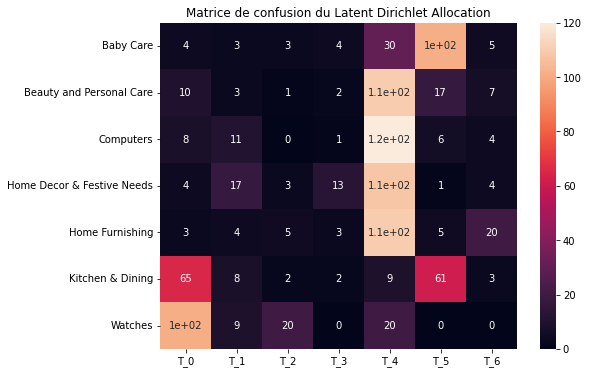

In [82]:
from sklearn.metrics import confusion_matrix, adjusted_rand_score
import seaborn as sns

cm = confusion_matrix(y_true_lb, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True)
plt.yticks(np.arange(7)+0.5,list(df_tfidfvect.index), rotation='horizontal')
plt.xticks(np.arange(7)+0.5, ['T_' + str(i) for i in range(7)])
plt.title('Matrice de confusion du Latent Dirichlet Allocation')
plt.savefig("lda_matrix.png", bbox_inches='tight', transparent=True)
plt.show()

In [83]:
adjusted_rand_score(y_true_lb, y_pred)

0.1677290175161837

### Visualisation des données

#### Via TSNE

In [84]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_embedded = tsne.fit_transform(lda_prediction)
tsn = pd.DataFrame(X_embedded, index=y_true)

C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [85]:
tsn.sample(3)

,0,1
Computers,5.921377,-38.551426
Home Decor & Festive Needs,-10.680544,-41.937923
Baby Care,-47.670414,12.830060


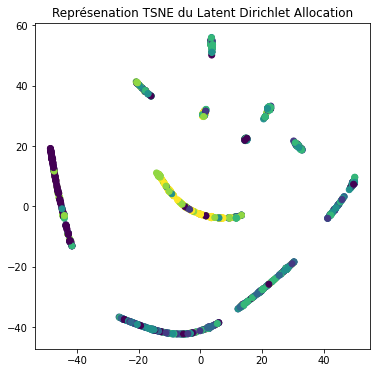

In [86]:
f, ax = plt.subplots(figsize=(6,6))
ax.scatter(tsn.loc[:,0], tsn.loc[:,1], c=y_true_lb)

plt.title('Représenation TSNE du Latent Dirichlet Allocation')
plt.savefig("lda_tsne.png", bbox_inches='tight', transparent=True)

#for i,txt in enumerate(tsn.index):
#    ax.annotate(txt, (tsn.iloc[i,0], tsn.iloc[i,1]))
plt.show()

#### Via PCA

In [87]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(lda_prediction)
pca.explained_variance_ratio_.cumsum()

array([0.49136781, 0.76442101, 0.8685608 , 0.92440563, 0.96742078,
       1.        , 1.        ])

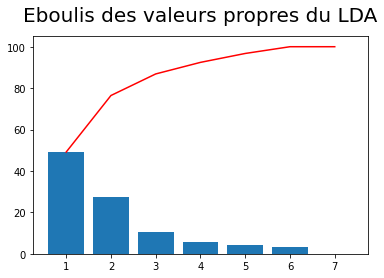

In [88]:
# Eboulis des valeurs propres

scree = pca.explained_variance_ratio_*100
plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(), c='red')
plt.title("Eboulis des valeurs propres du LDA", fontsize=20, pad=15)
plt.savefig("lda_eboulis.png", bbox_inches='tight', transparent=True)
plt.show()

In [89]:
pcs = pca.components_

In [90]:
# Calcul des composantes principales
cos = pd.DataFrame(np.round_(pcs,2), index=['F'+str(i+1) for i in range(pca.n_components_)], columns=df_tfidfvect.index)
cos = abs(cos)
cos = cos.transpose()
cos

,F1,F2,F3,F4,F5,F6,F7
Baby Care,0.36,0.70,0.46,0.10,0.05,0.07,0.38
Beauty and Personal Care,0.05,0.00,0.55,0.71,0.15,0.14,0.38
Computers,0.03,0.00,0.23,0.28,0.78,0.33,0.38
Home Decor & Festive Needs,0.02,0.00,0.15,0.12,0.11,0.90,0.38
Home Furnishing,0.86,0.00,0.32,0.09,0.05,0.06,0.38
Kitchen & Dining,0.36,0.71,0.46,0.10,0.05,0.07,0.38
Watches,0.04,0.00,0.31,0.60,0.59,0.22,0.38


In [91]:
acp = pca.transform(lda_prediction)

In [92]:
acp.shape

(1050, 7)

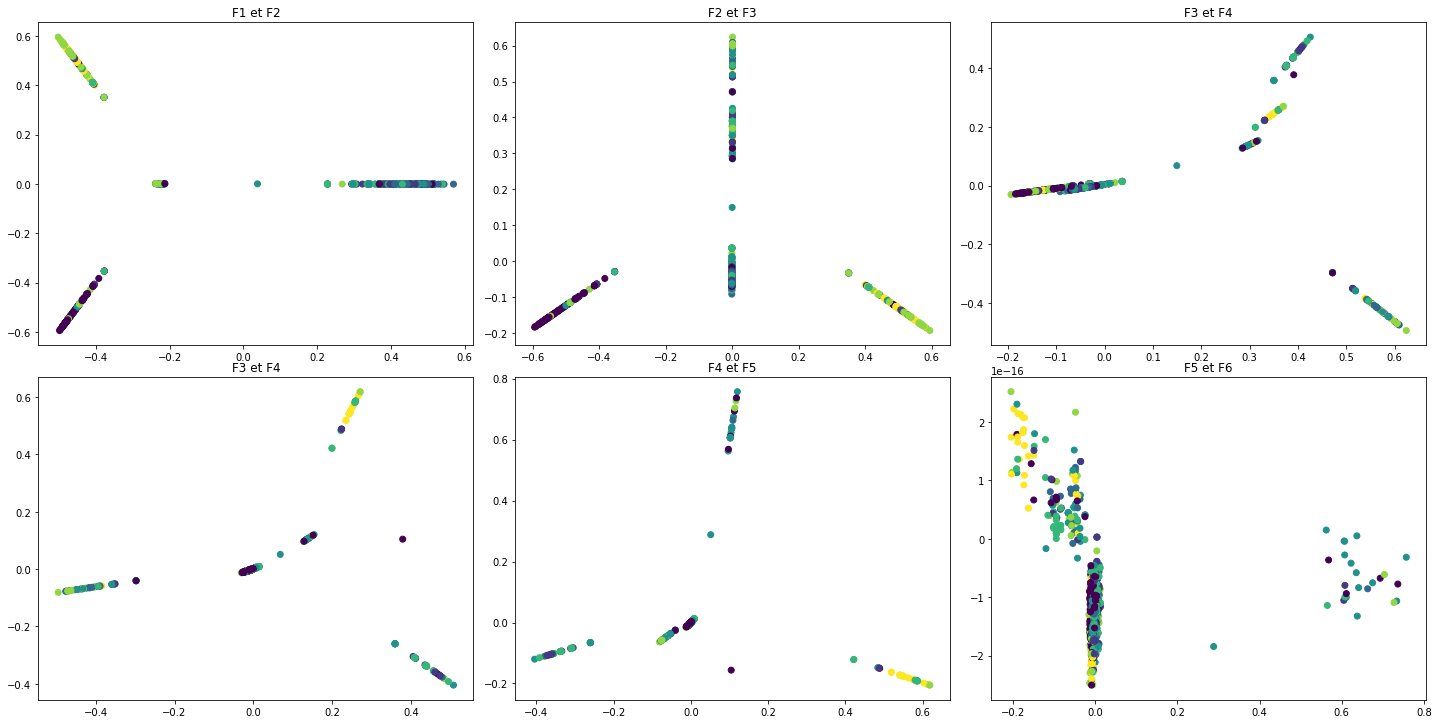

In [93]:
f, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
f.tight_layout()
for i in np.arange(3):
    ax[0,i].scatter(acp[:,i], acp[:,i+1], c=y_true_lb)
    ax[0,i].title.set_text('F{} et F{}'.format(i+1, i+2))
    ax[1,i].scatter(acp[:,[3+i]], acp[:,[4+i]], c=y_true_lb)
    ax[1,i].title.set_text('F{} et F{}'.format(3+i, 4+i))
plt.savefig("lda_acp_kmean.png", bbox_inches='tight', transparent=True)
plt.show()

##### [sommaire](#S)

## D, Modélisation par Negative Matrix factorization (NMF) <a class='anchor' id='IID'></a>

### Mise en place du modèle

In [94]:
from sklearn.decomposition import NMF

In [95]:
nmf = NMF(n_components=7, init='nndsvda')

In [96]:
nmf.fit(df_tfidfvect)

NMF(init='nndsvda', n_components=7)

In [172]:
display_topics(nmf, tfidf_tokens, 20)

Topic 0 :
pile yarn blstri strblue coverbuy gold aroma afternoon afternoon siesta trident hnh1 trident trick horizont ferrari ferrari 75x150cm solid short goe greedi goe trendz softright trendz pamper origin nkp blstri kolaveri

Topic 1 :
01433cmgi 7963pp02 dean 8925ym06 8925ym06 flippd 8944sl03 8944sl03 317tms317 8959yl01 8959yl01 yuva 8974pp01 8974pp01 n1192 romex priceless mundan mundan timepiec romex 906_blk 906_blk flaunt cnl cnl rg fabul event rked perucci

Topic 2 :
zyxel 3g mani anti mb990hn mb990ll mb990hn mb133ll 60w mb133ll mb003ta respect mb003ta mb003ja mb003ta mb003ja maximum keyston max peacock max mathemat num mathemat match femal mari max mari manualkey smartpro mb990ll

Topic 3 :
purpos popular reusabl soften chandan multivitamin rheumat arthriti rheumat reviv benefit reviv charg surg returnspecif brillar read bedroom returnspecif returnkey stay returnkey return fidel cheek cheek super richfeel richfeel sunshield chandan chamomil angelica

Topic 4 :
bo slicer ski winn

### Test du modèle sur les données

In [98]:
nmf_prediction = nmf.transform(data_vect)

In [99]:
y_pred = pd.DataFrame(nmf_prediction).idxmax(axis=1).values

In [100]:
from sklearn.metrics import confusion_matrix, adjusted_rand_score
import seaborn as sns

In [101]:
y_pred[y_pred==5]=10
y_pred[y_pred==3]=11
y_pred[y_pred==6]=12
y_pred[y_pred==0]=13
y_pred[y_pred==4]=14
y_pred[y_pred==1]=15

y_pred[y_pred==10]=0
y_pred[y_pred==11]=1
y_pred[y_pred==12]=3
y_pred[y_pred==13]=4
y_pred[y_pred==14]=5
y_pred[y_pred==15]=6

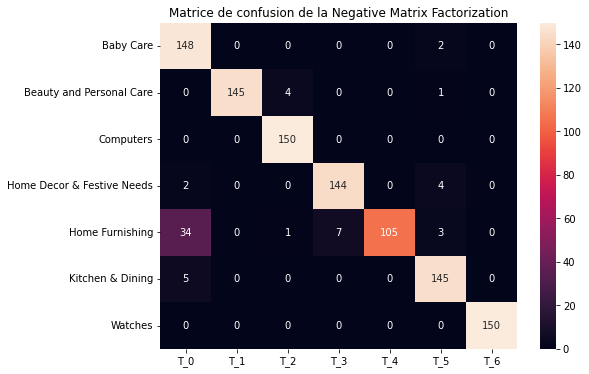

In [102]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true_lb, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.yticks(np.arange(7)+0.5,list(df_tfidfvect.index), rotation='horizontal')
plt.xticks(np.arange(7)+0.5, ['T_' + str(i) for i in range(7)])
plt.title('Matrice de confusion de la Negative Matrix Factorization')
plt.savefig("nmf_matrix.png", bbox_inches='tight', transparent=True)
plt.show()

In [103]:
adjusted_rand_score(y_true_lb, y_pred)

0.8722369978091874

### Visualisation des données

#### Via TSNE

In [104]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_embedded = tsne.fit_transform(nmf_prediction)
tsn = pd.DataFrame(X_embedded, index=y_true_lb)

C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [105]:
tsn.sample(3)

,0,1
1,1.185256,-22.650204
1,-6.435198,-17.634056
1,8.902879,-29.159235


In [106]:
legende = list(set(y_true))

In [107]:
legende

['Home Furnishing',
 'Home Decor & Festive Needs',
 'Baby Care',
 'Beauty and Personal Care',
 'Kitchen & Dining',
 'Watches',
 'Computers']

In [108]:
len(y_true_lb)

1050

In [109]:
[i for i in range(7)]

[0, 1, 2, 3, 4, 5, 6]

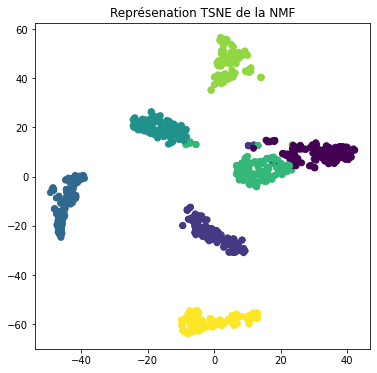

In [110]:
f, ax = plt.subplots(figsize=(6,6))
ax.scatter(tsn.loc[:,0], tsn.loc[:,1], c=y_true_lb)

plt.title('Représenation TSNE de la NMF')
plt.savefig("nmf_tsne.png", bbox_inches='tight', transparent=True)
#for i,txt in enumerate(tsn.index)
#    ax.annotate(txt, (tsn.iloc[i,0], tsn.iloc[i,1]))
plt.show()

#### Via PCA

In [111]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(nmf_prediction)
pca.explained_variance_ratio_.cumsum()

array([0.28997367, 0.50612037, 0.66691856, 0.81046234, 0.92701969,
       0.98436901, 1.        ])

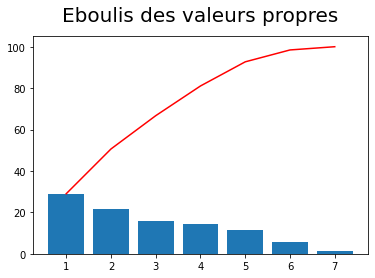

In [112]:
# Eboulis des valeurs propres

scree = pca.explained_variance_ratio_*100
plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(), c='red')
plt.title("Eboulis des valeurs propres", fontsize=20, pad=15)
plt.savefig("nmf_eboulis.png", bbox_inches='tight', transparent=True)
plt.show()

In [113]:
pcs = pca.components_

In [114]:
# Calcul des composantes principales
cos = pd.DataFrame(np.round_(pcs,2), index=['F'+str(i+1) for i in range(pca.n_components_)], columns=df_tfidfvect.index)
cos = abs(cos)
cos = cos.transpose()
cos

,F1,F2,F3,F4,F5,F6,F7
Baby Care,0.04,0.05,0.03,0.05,0.13,0.33,0.93
Beauty and Personal Care,0.17,0.90,0.08,0.03,0.25,0.24,0.16
Computers,0.92,0.05,0.08,0.17,0.07,0.30,0.15
Home Decor & Festive Needs,0.11,0.28,0.81,0.20,0.15,0.39,0.16
Home Furnishing,0.15,0.30,0.38,0.33,0.68,0.35,0.20
Kitchen & Dining,0.28,0.10,0.40,0.81,0.09,0.30,0.02
Watches,0.11,0.00,0.12,0.40,0.64,0.62,0.13


In [115]:
acp = pca.transform(nmf_prediction)

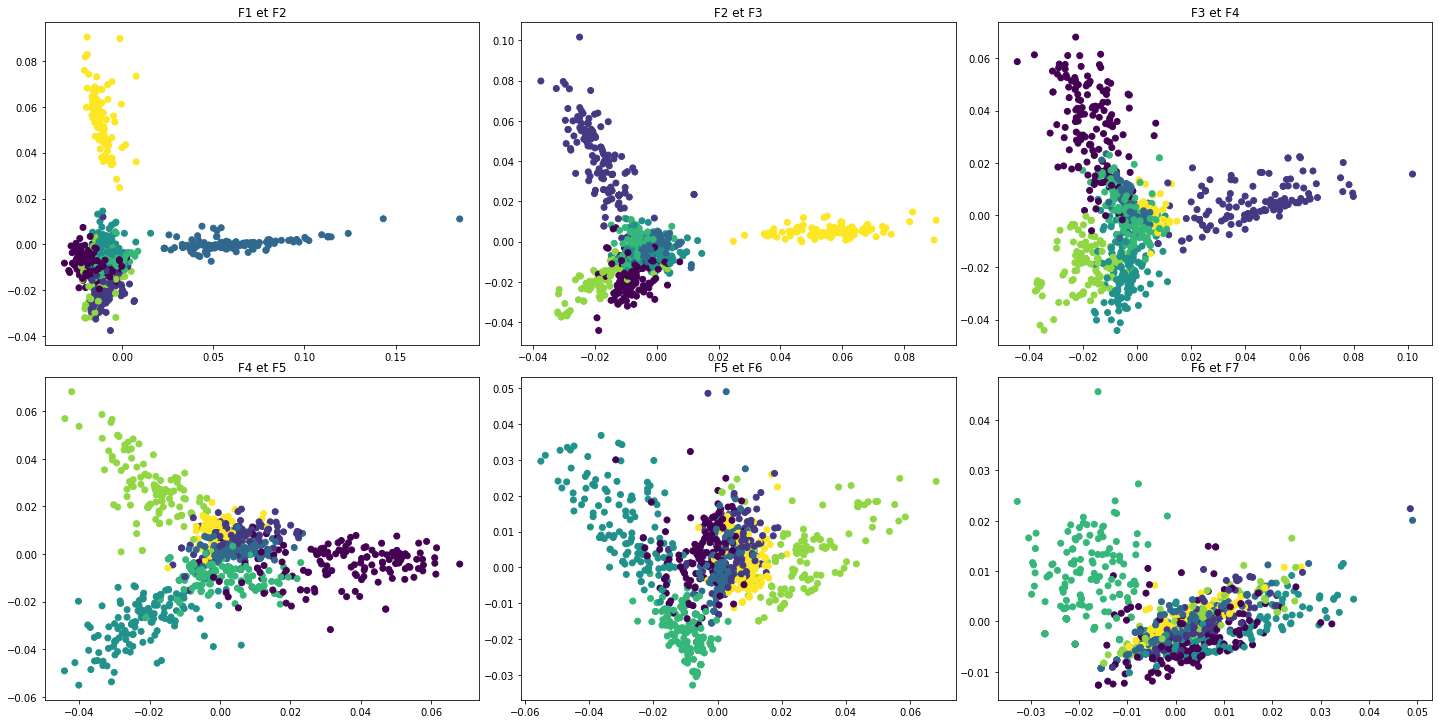

In [116]:
f, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
f.tight_layout()
for i in np.arange(3):
    ax[0,i].scatter(acp[:,i], acp[:,i+1], c=y_true_lb)
    ax[0,i].title.set_text('F{} et F{}'.format(i+1, i+2))
    ax[1,i].scatter(acp[:,[3+i]], acp[:,[4+i]], c=y_true_lb)
    ax[1,i].title.set_text('F{} et F{}'.format(4+i, 5+i))
    
plt.savefig("nmf_acp_kmean.png", bbox_inches='tight', transparent=True)
plt.show()

##### [sommaire](#S)

# III, Mise en place d'un réseau de neurone <a class='anchor' id='III'></a>

## A, Préparation des datas <a class='anchor' id='IIIA'></a>

In [11]:
import tensorflow as tf
from tensorflow import keras

In [23]:
liste_description = list(data.description)

In [24]:
liste_categorie = list(data.cat_1)

In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

liste_cat_encoder = le.fit_transform(liste_categorie)

In [26]:
data['label_cat'] = liste_cat_encoder

In [27]:
tokenizer = nltk.RegexpTokenizer(r'\w+') 
token_total = tokenizer.tokenize(str(liste_description))
token_total = set(token_total)# liste de mots unique

In [28]:
# integer encode the documents
vocab_size = int(len(token_total) *1.2)
encoded_docs = [keras.preprocessing.text.one_hot(d, vocab_size) for d in liste_description]
print(encoded_docs[0][:10])

[1691, 5648, 8706, 6754, 8014, 2521, 1052, 701, 4787, 2207]


In [29]:
count = {}

for i in range(1050):
    count[i] = len(encoded_docs[i])
max_description = max(count, key=count.get)

In [30]:
# pad documents to a max lengh of x words
max_lengh = max_description
padded_docs = keras.preprocessing.sequence.pad_sequences(encoded_docs, maxlen=max_lengh, padding='post')
print(padded_docs[0])

[1691 5648 8706 6754 8014 2521 1052  701 4787 2207 6167 2207 6754 8014
 2521 1052  701 4787 2207 1937 8778 8791 9111 8232 8706 8576 7417 2007
 5372  748 2207 2415 5750 7006 8706 5750 7961  748 2207 1301 6505 9420
 4696 7297 8818 8014 7488 8646 5648 2187  701 3453 2539 7788 8612 7958
 8646  853 5750   94 6671 9159 5453 6347  748 2207 1301 7897 3606 5453
 7634 5445 5453 7302 2361 9186 1691  343 2178 7995 1097 5453 6883 3623
 7788 2350 6747 5750 1113  984 1301 4081 5370 5962  400 2350 4061  701
 5453 7903 1251 2337 3121 1503 5667 8480 1052 5023 1386 9377  955 8791
 5750 3737 5370 2008 5750 1097 4812 7465 8480  638 5370  453 6540 3737
 5370 5750   65   81 5453 5667 8480 1052 5023 6663 8791 5750  121 8480
 6580 5750 9255 3199 3895 8706 4436 1245 2744 7158 5750 8809 5627 1990
 2178 5750 2361 2207  172  422 3066  163 8791  343   94 1503  172 8480
 1583 5750 3301 1705 8706 9147 3583 8706 6754 8014 2521 1052  701 4787
 2207 1937 8778 8791 9111 8232 8706 8576 6225 3587 6754 4049 7123 4787
 2242 

In [34]:
df_rnn = pd.DataFrame(padded_docs)
df_rnn['categorie'] = liste_cat_encoder
df_rnn.sample(3)

,0,1,2,3,4,5,6,7,8,9,...,428,429,430,431,432,433,434,435,436,categorie
7,6416,1921,7304,6419,9174,1909,2229,2789,3802,7123,...,0,0,0,0,0,0,0,0,0,6
286,3583,8706,7183,8612,6748,2789,3802,7123,3328,6225,...,0,0,0,0,0,0,0,0,0,6
579,94,1931,1899,2789,3802,7123,3328,9234,94,1931,...,0,0,0,0,0,0,0,0,0,6


In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(padded_docs, liste_cat_encoder, test_size=0.3)

In [36]:
X_train.shape

(735, 437)

In [37]:
X_test.shape

(315, 437)

##### [sommaire](#S)

## B, Création d'un réseau de neurone récurrent simple RNN <a class='anchor' id='IIIB'></a>

### Mise en place du modèle

#### Modèle avec hyper tuning

In [130]:
import keras_tuner as kt

In [131]:
def model_builder(hp):
    model = keras.models.Sequential()
    
    model.add(keras.layers.Embedding(vocab_size, 80, input_length=max_lengh))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(7, activation='softmax'))
    
    
    hp_neurones = hp.Choice('num_neurones', values=[50, 80, 100, 150], default=80)
    model.add(keras.layers.Embedding(vocab_size, hp_neurones, input_length=max_lengh))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(7, activation='softmax'))
    
    hp_learning_rate = hp.Choice('learning_rate', values=[0.0001, 0.001, 0.01, 0.1])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate = hp_learning_rate), loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

    return model

In [132]:
tuner = kt.Hyperband(model_builder,
                    objective='accuracy',
                    max_epochs=10,
                    factor=3,
                    directory='my_dir',
                    project_name='hyper_tuning')

INFO:tensorflow:Reloading Oracle from existing project my_dir\hyper_tuning\oracle.json
INFO:tensorflow:Reloading Tuner from my_dir\hyper_tuning\tuner0.json


In [133]:
tuner.search(X_train, y_train, epochs=10, steps_per_epoch=20, verbose=0)

INFO:tensorflow:Oracle triggered exit


In [134]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete.\n The optimal filter in second Convolutional layer is  {best_hps.get('num_neurones')}.\n And the optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
""")


The hyperparameter search is complete.
 The optimal filter in second Convolutional layer is  150.
 And the optimal learning rate for the optimizer is 0.1.



In [135]:
model = keras.models.Sequential()
model.add(keras.layers.Embedding(vocab_size, 50, input_length=max_lengh))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(7, activation='softmax'))

model.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.1), loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [136]:
import time
start = time.perf_counter()
model.fit(X_train, y_train, epochs=100, verbose=0)
elapsed = time.perf_counter() - start
print('Elapsed %.3f seconds.' % elapsed)

Elapsed 10.219 seconds.


In [137]:
loss, accuracy = model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 3ms/step - loss: 15.4479 - accuracy: 0.8254


#### Modèle sans hyper tuning

In [31]:
rnn = keras.models.Sequential()
rnn.add(keras.layers.Embedding(vocab_size, 80, input_length=max_lengh))
rnn.add(keras.layers.Flatten())
rnn.add(keras.layers.Dense(7, activation='softmax'))

rnn.compile(optimizer='Adam', loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [32]:
rnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 437, 80)           756480    
_________________________________________________________________
flatten (Flatten)            (None, 34960)             0         
_________________________________________________________________
dense (Dense)                (None, 7)                 244727    
Total params: 1,001,207
Trainable params: 1,001,207
Non-trainable params: 0
_________________________________________________________________


In [38]:
import time
start = time.perf_counter()
rnn.fit(X_train, y_train, epochs=100, verbose=0)
elapsed = time.perf_counter() - start
print('Elapsed %.3f seconds.' % elapsed)

Elapsed 10.701 seconds.


In [140]:
loss, accuracy = rnn.evaluate(X_test, y_test)

10/10 [==============================] - 0s 4ms/step - loss: 0.2746 - accuracy: 0.9079


In [141]:
rnn.save('rnn/save')

INFO:tensorflow:Assets written to: rnn/save\assets


### Test du modèle

In [142]:
y_predicted = rnn.predict(X_test)

In [143]:
X_test.shape

(315, 437)

In [144]:
y_pred = []

for i in range(len(y_predicted)):
    y_pred.append(np.argmax(y_predicted[i]))

In [145]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
cm

<tf.Tensor: shape=(7, 7), dtype=int32, numpy=
array([[32,  2,  1,  2,  6,  1,  0],
       [ 2, 40,  1,  1,  0,  0,  0],
       [ 1,  0, 40,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  1,  0,  0],
       [ 2,  0,  1,  0, 46,  0,  0],
       [ 1,  1,  0,  1,  1, 39,  0],
       [ 0,  2,  0,  1,  0,  1, 47]])>

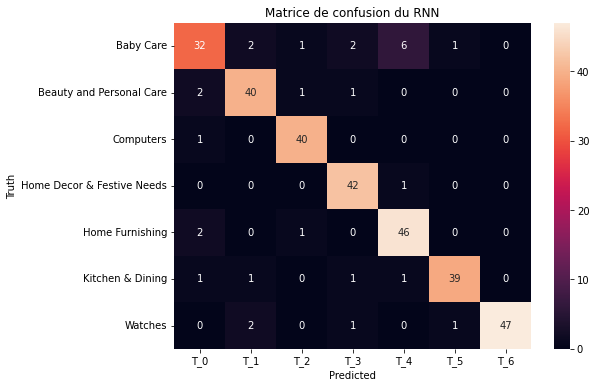

In [146]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.yticks(np.arange(7)+0.5,list(df_tfidfvect.index), rotation='horizontal')
plt.xticks(np.arange(7)+0.5, ['T_' + str(i) for i in range(7)])
plt.title('Matrice de confusion du RNN')
plt.savefig("rnn_matrix.png", bbox_inches='tight', transparent=True)
plt.show()

In [147]:
adjusted_rand_score(y_test, y_pred)

0.8008771359344489

### Visualisation du modèle

#### TSNE

In [148]:
rnn_prediction = rnn.predict(padded_docs)

In [149]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_embedded = tsne.fit_transform(rnn_prediction)
tsn = pd.DataFrame(X_embedded, index=y_true_lb)

C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


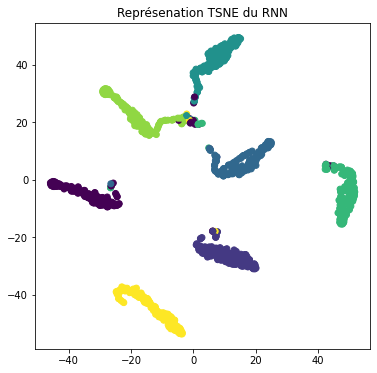

In [150]:
f, ax = plt.subplots(figsize=(6,6))
ax.scatter(tsn.loc[:,0], tsn.loc[:,1], c=y_true_lb)

plt.title('Représenation TSNE du RNN')
plt.savefig("rnn_tsne.png", bbox_inches='tight', transparent=True)
#for i,txt in enumerate(tsn.index)
#    ax.annotate(txt, (tsn.iloc[i,0], tsn.iloc[i,1]))
plt.show()

#### PCA

In [151]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(rnn_prediction)
pca.explained_variance_ratio_.cumsum()

array([0.17170195, 0.34208137, 0.5108191 , 0.6779418 , 0.84063995,
       1.        , 1.        ], dtype=float32)

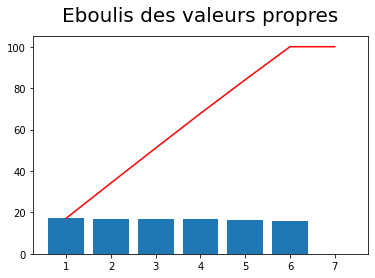

In [152]:
# Eboulis des valeurs propres

scree = pca.explained_variance_ratio_*100
plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(), c='red')
plt.title("Eboulis des valeurs propres", fontsize=20, pad=15)
plt.savefig("rnn_eboulis.png", bbox_inches='tight', transparent=True)
plt.show()

In [153]:
pcs = pca.components_

In [154]:
acp = pca.transform(rnn_prediction)

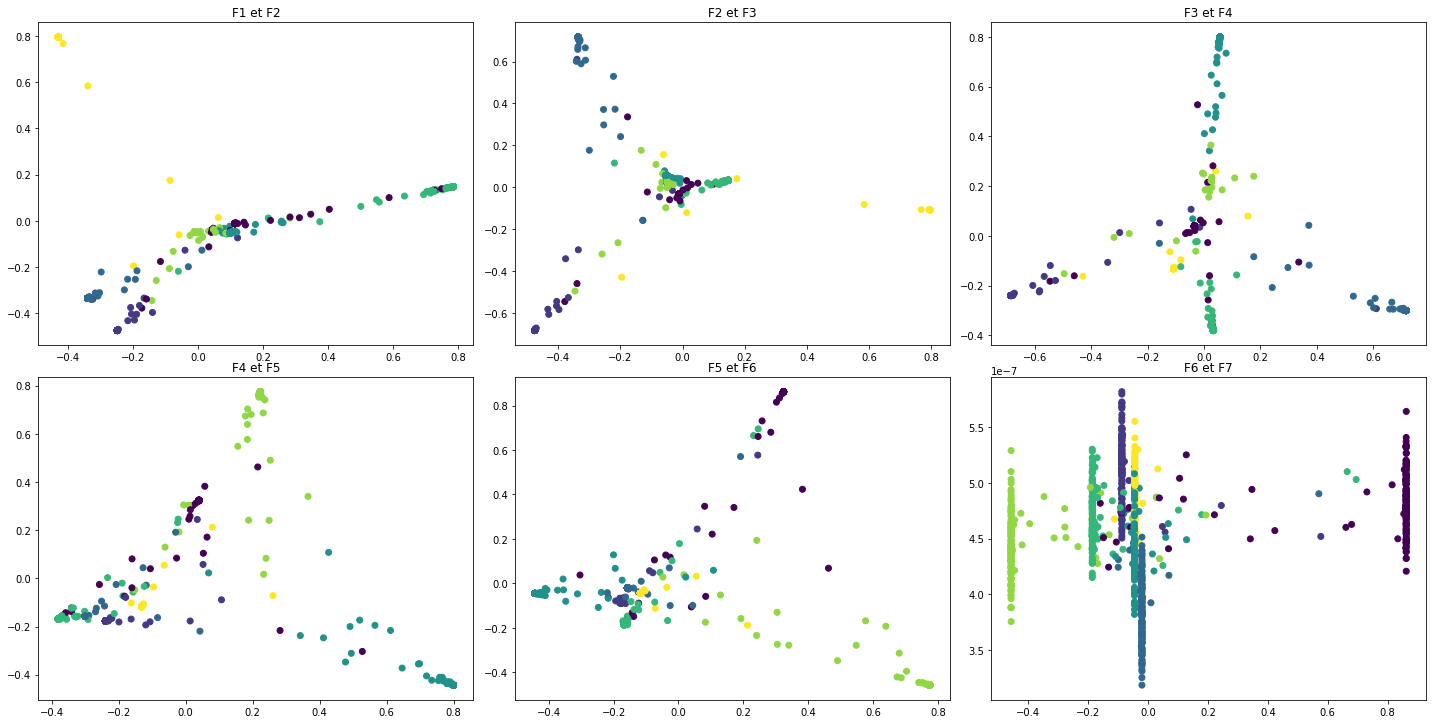

In [155]:
f, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
f.tight_layout()
for i in np.arange(3):
    ax[0,i].scatter(acp[:,i], acp[:,i+1], c=y_true_lb)
    ax[0,i].title.set_text('F{} et F{}'.format(i+1, i+2))
    ax[1,i].scatter(acp[:,[3+i]], acp[:,[4+i]], c=y_true_lb)
    ax[1,i].title.set_text('F{} et F{}'.format(4+i, 5+i))
    
plt.savefig("rnn_acp_kmean.png", bbox_inches='tight', transparent=True)
plt.show()

##### [sommaire](#S)

## C, Création d'un RNN bidirectionnel <a class='anchor' id='IIIC'></a>

In [156]:
rnn_bi = keras.models.Sequential()
rnn_bi.add(keras.layers.Embedding(vocab_size, output_dim=80, input_length=max_lengh, name='embedding'))
rnn_bi.add(keras.layers.Bidirectional(keras.layers.LSTM(160)))
rnn_bi.add(keras.layers.Dense(7, activation='softmax'))

rnn_bi.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print(rnn_bi.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 437, 80)           756480    
_________________________________________________________________
bidirectional (Bidirectional (None, 320)               308480    
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 2247      
Total params: 1,067,207
Trainable params: 1,067,207
Non-trainable params: 0
_________________________________________________________________
None


In [157]:
start = time.perf_counter()
rnn_bi.fit(X_train, y_train, epochs=100, verbose=0)
elapsed = time.perf_counter() - start
print('Elapsed %.3f seconds.' % elapsed)

Elapsed 360.408 seconds.


In [158]:
loss, accuracy = rnn_bi.evaluate(X_test, y_test)

10/10 [==============================] - 1s 30ms/step - loss: 0.7219 - accuracy: 0.7905


### Test du modèle

In [159]:
y_predicted = rnn_bi.predict(X_test)

y_pred = []

for i in range(len(y_predicted)):
    y_pred.append(np.argmax(y_predicted[i]))

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
cm

<tf.Tensor: shape=(7, 7), dtype=int32, numpy=
array([[27,  5,  1,  3,  7,  1,  0],
       [ 1, 35,  2,  6,  0,  0,  0],
       [ 0,  2, 30,  9,  0,  0,  0],
       [ 1,  3,  2, 37,  0,  0,  0],
       [ 0,  2,  0,  6, 41,  0,  0],
       [ 2,  3,  2,  6,  0, 30,  0],
       [ 0,  2,  0,  0,  0,  0, 49]])>

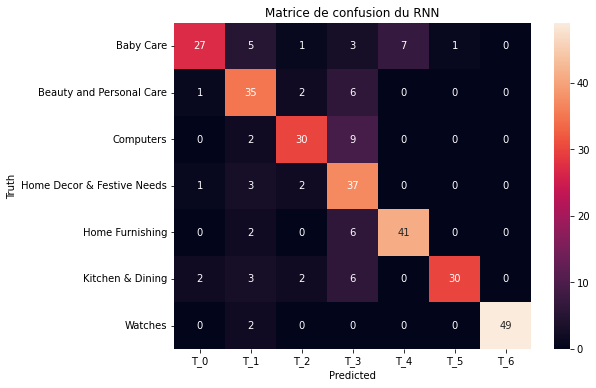

In [160]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.yticks(np.arange(7)+0.5,list(df_tfidfvect.index), rotation='horizontal')
plt.xticks(np.arange(7)+0.5, ['T_' + str(i) for i in range(7)])
plt.title('Matrice de confusion du RNN')
plt.savefig("rnn_bi_matrix.png", bbox_inches='tight', transparent=True)
plt.show()

In [161]:
adjusted_rand_score(y_test, y_pred)

0.5780671489438399

### Visualisation du modèle

#### TSNE

In [162]:
rnn_bi_prediction = rnn_bi.predict(padded_docs)

In [163]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_embedded = tsne.fit_transform(rnn_bi_prediction)
tsn = pd.DataFrame(X_embedded, index=y_true_lb)

C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


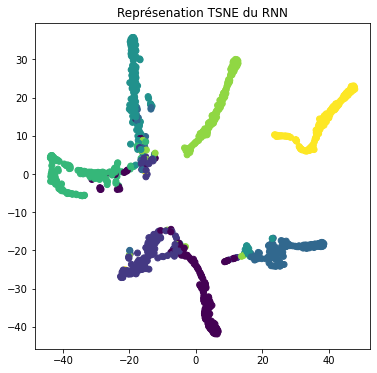

In [164]:
f, ax = plt.subplots(figsize=(6,6))
ax.scatter(tsn.loc[:,0], tsn.loc[:,1], c=y_true_lb)

plt.title('Représenation TSNE du RNN')
plt.savefig("rnn_bi_tsne.png", bbox_inches='tight', transparent=True)
#for i,txt in enumerate(tsn.index)
#    ax.annotate(txt, (tsn.iloc[i,0], tsn.iloc[i,1]))
plt.show()

#### PCA

In [165]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(rnn_bi_prediction)
pca.explained_variance_ratio_.cumsum()

array([0.24156772, 0.43775585, 0.6175125 , 0.7811117 , 0.93030673,
       1.        , 1.        ], dtype=float32)

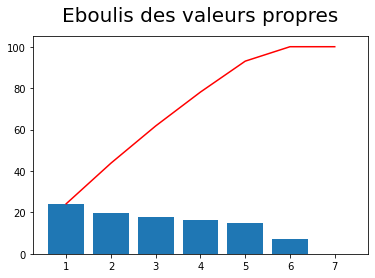

In [166]:
# Eboulis des valeurs propres

scree = pca.explained_variance_ratio_*100
plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(), c='red')
plt.title("Eboulis des valeurs propres", fontsize=20, pad=15)
plt.savefig("rnn_bi_eboulis.png", bbox_inches='tight', transparent=True)
plt.show()

In [167]:
acp = pca.transform(rnn_prediction)

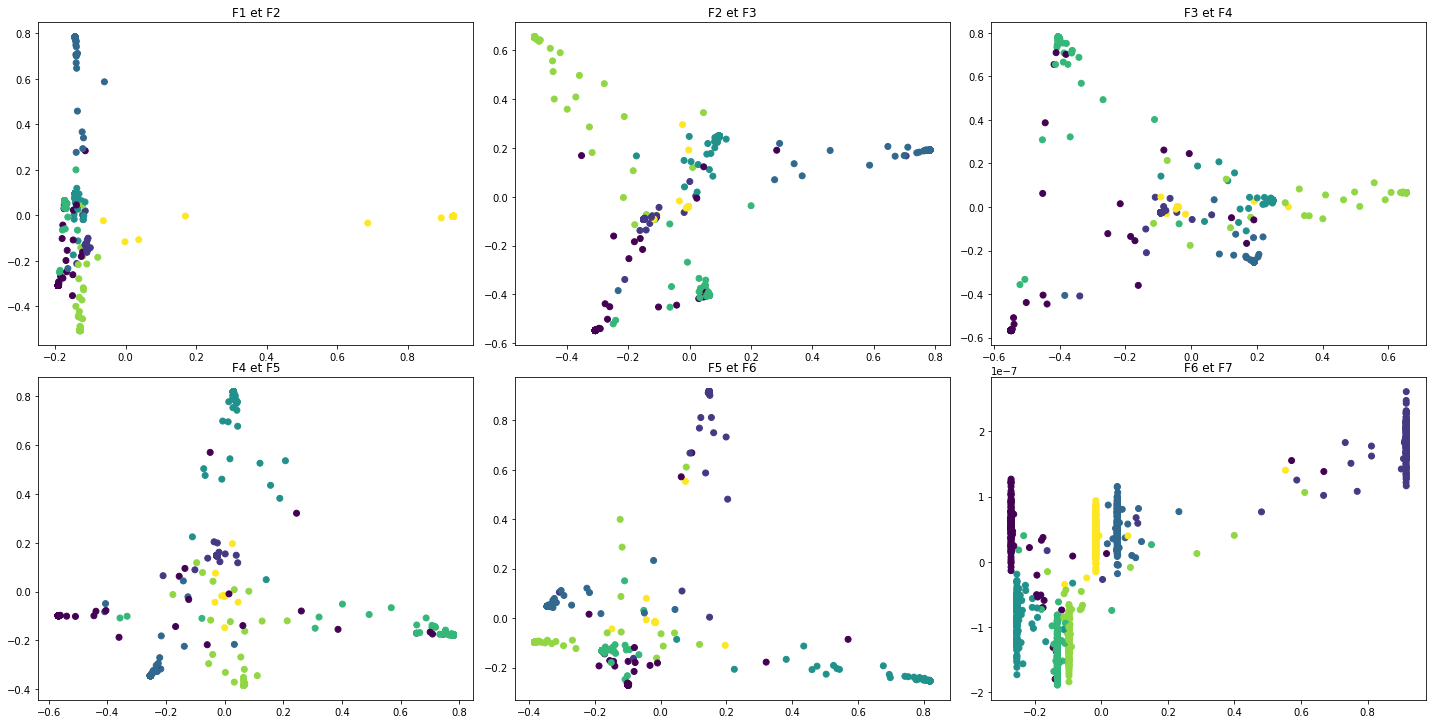

In [168]:
f, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
f.tight_layout()
for i in np.arange(3):
    ax[0,i].scatter(acp[:,i], acp[:,i+1], c=y_true_lb)
    ax[0,i].title.set_text('F{} et F{}'.format(i+1, i+2))
    ax[1,i].scatter(acp[:,[3+i]], acp[:,[4+i]], c=y_true_lb)
    ax[1,i].title.set_text('F{} et F{}'.format(4+i, 5+i))
    
plt.savefig("rnn_bi_acp_kmean.png", bbox_inches='tight', transparent=True)
plt.show()

##### [sommaire](#S)

# Bonus : Mise en place du modèle <a class='anchor' id='bonus'></a>

In [39]:
def model_predictif_unique(number):
    
    # chargement des datas
    import tensorflow as tf
    from tensorflow import keras
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    
    data = pd.read_csv('data.csv', index_col=0)
    
    
    # text
    liste_description = list(data.description)
    liste_categorie = list(data.cat_1)
    
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    liste_cat_encoder = le.fit_transform(liste_categorie)
    
    data['cat_lb'] = liste_cat_encoder
    
    import nltk
    tokenizer = nltk.RegexpTokenizer(r'\w+') 
    token_total = tokenizer.tokenize(str(liste_description))
    token_total = set(token_total)# liste de mots unique
    
    # integer encode the documents
    vocab_size = int(len(token_total) *1.2)
    encoded_docs = [keras.preprocessing.text.one_hot(d, vocab_size) for d in liste_description]
    
    count = {}

    for i in range(1050):
        count[i] = len(encoded_docs[i])
    max_description = max(count, key=count.get)
    
    # pad documents to a max lengh of x words
    max_lengh = max_description
    padded_docs = keras.preprocessing.sequence.pad_sequences(encoded_docs, maxlen=max_lengh, padding='post')
    
    df_rnn = pd.DataFrame(padded_docs)
    df_rnn['categorie'] = liste_cat_encoder
    df_rnn.sample(3)
    
    X = padded_docs[number]
    y = liste_cat_encoder[number]
    X = np.reshape(X, (1,437))
    
    y_pred_txt = rnn.predict(X)
    
    
    # Image
    
    cnn_lt = keras.models.load_model('cnn_tl/save')
    
    import pickle

    with open('images_resized.txt', 'rb') as fp:
        images_resized = pickle.load(fp)
    
    X = images_resized[number]
    X = np.array(X) / 255
    X = np.reshape(X, (1,224,224,3))
    
    y_pred_image = cnn_lt.predict(X)
    
    y_pred = (y_pred_txt + y_pred_image) / 2
    
    y_pred = np.argmax(y_pred)

    y_pred = data[data.cat_lb == y_pred].cat_1.unique()[0]
    
    return plt.imshow(images_resized[number]), print("L'objet est dans la catégorie : {}, le model l'a identifié comme a été identifié comme : {}, ".format(data.iloc[number,:].cat_1,y_pred))

In [ ]:
model_predictif_unique(np.random.randint(0,1050))

In [48]:
def model_predictif(number):
    
    # chargement des datas
    import tensorflow as tf
    from tensorflow import keras
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    
    data = pd.read_csv('data.csv', index_col=0)
    
    
    # text
    liste_description = list(data.description)
    liste_categorie = list(data.cat_1)
    
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    liste_cat_encoder = le.fit_transform(liste_categorie)
    
    data['cat_lb'] = liste_cat_encoder
    
    import nltk
    tokenizer = nltk.RegexpTokenizer(r'\w+') 
    token_total = tokenizer.tokenize(str(liste_description))
    token_total = set(token_total)# liste de mots unique
    
    # integer encode the documents
    vocab_size = int(len(token_total) *1.2)
    encoded_docs = [keras.preprocessing.text.one_hot(d, vocab_size) for d in liste_description]
    
    count = {}

    for i in range(1050):
        count[i] = len(encoded_docs[i])
    max_description = max(count, key=count.get)
    
    # pad documents to a max lengh of x words
    max_lengh = max_description
    padded_docs = keras.preprocessing.sequence.pad_sequences(encoded_docs, maxlen=max_lengh, padding='post')
    
    df_rnn = pd.DataFrame(padded_docs)
    df_rnn['categorie'] = liste_cat_encoder
    df_rnn.sample(3)
    
    X = padded_docs[number]
    y = liste_cat_encoder[number]
    X = np.reshape(X, (1,437))
    
    y_pred_txt = rnn.predict(X)
    
    
    # Image
    
    cnn_lt = keras.models.load_model('cnn_tl/save')
    
    import pickle

    with open('images_resized.txt', 'rb') as fp:
        images_resized = pickle.load(fp)
    
    X = images_resized[number]
    X = np.array(X) / 255
    X = np.reshape(X, (1,224,224,3))
    
    y_pred_image = cnn_lt.predict(X)
    
    y_pred = (y_pred_txt + y_pred_image) / 2
    
    y_pred = np.argmax(y_pred)

    y_pred = data[data.cat_lb == y_pred].cat_1.unique()[0]
    
    return data.iloc[number,:].cat_1, y_pred

In [45]:
import random

random_list = []

for i in range(315):
    n = random.randint(0,1050)
    random_list.append(n)

In [49]:
y_true_list = []
y_pred_list = []

for i in random_list:
    y_true, y_pred = model_predictif(i)
    y_true_list.append(y_true)
    y_pred_list.append(y_pred)

In [66]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

lb.fit(y_pred_list)

y_pred_list_lb = lb.transform(y_pred_list)
y_true_list_lb = lb.transform(y_true_list)

In [72]:
lb.classes_

array(['Baby Care', 'Beauty and Personal Care', 'Computers',
       'Home Decor & Festive Needs', 'Home Furnishing',
       'Kitchen & Dining', 'Watches'], dtype='<U26')

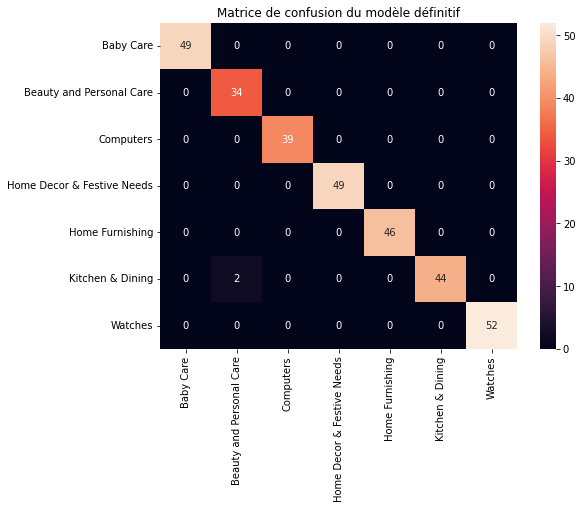

In [79]:
from sklearn.metrics import confusion_matrix, adjusted_rand_score
import seaborn as sns
import matplotlib.pyplot as plt
    
cm = confusion_matrix(y_true_list_lb, y_pred_list_lb)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True)
plt.yticks(np.arange(7)+0.5,lb.classes_, rotation='horizontal')
plt.xticks(np.arange(7)+0.5, lb.classes_, rotation='vertical')
plt.title('Matrice de confusion du modèle définitif')
plt.savefig("model_def_matrix.png", bbox_inches='tight', transparent=True)
plt.show()

In [78]:
adjusted_rand_score(y_true_list_lb, y_pred_list_lb)

0.9870814868100215

##### Fin de page <a class='anchor' id='F'></a>

##### [sommaire](#S)